In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
df = pd.read_csv("contract.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UID                   10000 non-null  int64  
 1   Prod_output_num       10000 non-null  int64  
 2   click_on_prod         10000 non-null  int64  
 3   locations             10000 non-null  object 
 4   gender                10000 non-null  object 
 5   age                   10000 non-null  int64  
 6   balance               10000 non-null  float64
 7   registry_to_use_time  10000 non-null  int64  
 8   credit_card_paid      10000 non-null  int64  
 9   active_member         10000 non-null  int64  
 10  estimated_salary      10000 non-null  float64
 11  buy                   10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
df.describe()

,UID,Prod_output_num,click_on_prod,age,balance,registry_to_use_time,credit_card_paid,active_member,estimated_salary,buy
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5.012800,650.528800,38.921800,76485.889288,3.469800,0.70550,0.484900,100090.239881,0.203700
std,2886.89568,2.892174,96.653299,10.487806,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,0.00000,0.000000,350.000000,18.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2499.75000,3.000000,584.000000,32.000000,0.000000,3.000000,0.00000,0.000000,51002.110000,0.000000
50%,4999.50000,5.000000,652.000000,37.000000,97198.540000,4.000000,1.00000,0.000000,100193.915000,0.000000
75%,7499.25000,7.000000,718.000000,44.000000,127644.240000,4.000000,1.00000,1.000000,149388.247500,0.000000
max,9999.00000,10.000000,850.000000,92.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


檢視購買狀況，繪圖顯示。

np.float64(0.2037)

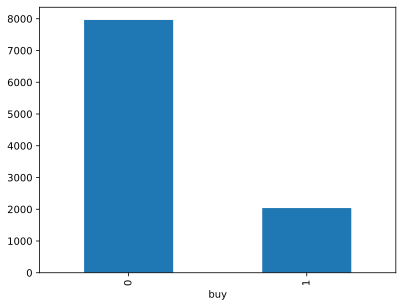

In [4]:
df.groupby('buy')['UID'].count().plot(
    kind='bar')

df['buy'].sum()/df.shape[0]

算出購買率。

In [5]:
print("buy rate: %0.4f" % df["buy"].mean())

buy rate: 0.2037


分類前的資料處理與轉換，one-hot encoding。

In [6]:
import pandas as pd

df_encode = pd.get_dummies(df)

定義 $X$ 與 $y$

In [7]:
X = df_encode.drop(columns=["buy", "UID"])
y = df_encode["buy"]

切割訓練集與測試集。

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

assert isinstance(X_train, pd.DataFrame)
assert isinstance(X_test, pd.DataFrame)
assert isinstance(y_train, pd.Series)
assert isinstance(y_test, pd.Series)

## `LogisticRegression` 邏吉斯回歸，$X$ 特徵值無正規化

In [10]:
from sklearn.linear_model import LogisticRegression

建立模型物件並進行訓練。

In [11]:
# 建立模型物件
rf_model = LogisticRegression()

# 進行訓練
rf_model.fit(X_train, y_train)

/Volumes/Dev/nkust/nkust-homework/semester-5/business-platform-design/ch13/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

預測 $y$ 值。

In [12]:
y_test_pred = rf_model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

預測值機率 (Predict Probability)。

- **predict_proba** 的輸出是一對值，其中：
  - **a** = $P(\text{class}(x) = 0)$
  - **b** = $P(\text{class}(x) = 1)$

In [13]:
rf_model_proba=rf_model.predict_proba(X_test)

In [14]:
rf_model_proba # notbuy, buy的機率

array([[0.82415102, 0.17584898],
       [0.62169561, 0.37830439],
       [0.85049475, 0.14950525],
       ...,
       [0.65643839, 0.34356161],
       [0.78175065, 0.21824935],
       [0.8462042 , 0.1537958 ]])

In [15]:
rf_model_proba[:,1] # 有buy的機率

array([0.17584898, 0.37830439, 0.14950525, ..., 0.34356161, 0.21824935,
       0.1537958 ])

準確率。直接用 `model.score`

In [16]:
print('regr_model.score: %0.4f' % rf_model.score(X_test,y_test))

regr_model.score: 0.7855


Accurary, Precision, Recall, F1-Score.

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

regr_model_acc = accuracy_score(y_test, y_test_pred)
regr_model_precision = precision_score(y_test, y_test_pred)
regr_model_recall = recall_score(y_test, y_test_pred)
regr_model_f1 = f1_score(y_test, y_test_pred)

print('regr_model_acc:\t\t%0.4f' % regr_model_acc)
print('regr_model_precision:\t%0.4f' % regr_model_precision)
print('regr_model_recall:\t%0.4f' % regr_model_recall)
print('regr_model_f1:\t\t%0.4f' % regr_model_f1)

regr_model_acc:		0.7855
regr_model_precision:	0.3537
regr_model_recall:	0.0716
regr_model_f1:		0.1191


ROC & AUC

In [18]:
from sklearn.metrics import roc_curve, auc

# 對測試集 X_test 使用模型進行預測，並取出模型預測的「陽性」機率分數。
X_test_predsba = rf_model.predict_proba(X_test)[:,1]

# 計算測試資料的 ROC 曲線資料，並返回三個值
X_test_fpr, X_test_tpr, x_test_thresholds = roc_curve(y_test, X_test_predsba)

# 計算 AUC（曲線下面積），衡量模型區分「陽性」和「陰性」樣本的能力。
X_test_roc_auc = auc(X_test_fpr, X_test_tpr)

print('x_test AUC: %0.4f' % X_test_roc_auc)

x_test AUC: 0.6724


畫出曲線圖。

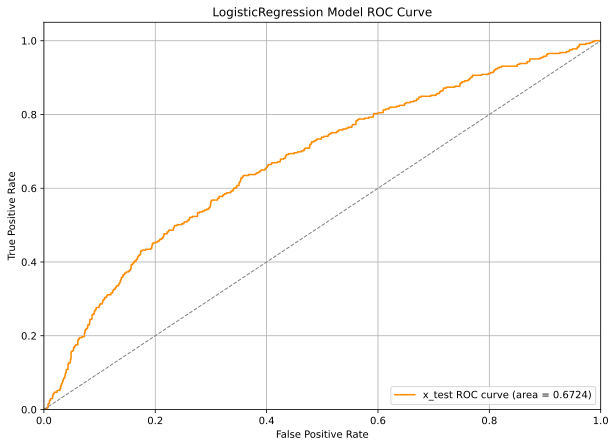

In [19]:
plt.figure(figsize=(10,7))

plt.plot(
    X_test_fpr, X_test_tpr, color='darkorange', label='x_test ROC curve (area = %0.4f)' % X_test_roc_auc
)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

# LogisticRegression 邏吉斯回歸，進行正規化

結論：accuracy、precision、recall 分數變高，auc 變低

In [20]:
rf_model = LogisticRegression()

對 $X$ 進行正規化。

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_stds = sc.fit_transform(X_train)
X_test_stds = sc.fit_transform(X_test)

進行訓練。

In [22]:
rf_model.fit(X_train_stds, y_train)

LogisticRegression()

預測。

In [23]:
y_test_pred=rf_model.predict(X_test_stds)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

預測值機率 (Predict Probability)。

- **predict_proba** 的輸出是一對值，其中：
  - **a** = $P(\text{class}(x) = 0)$
  - **b** = $P(\text{class}(x) = 1)$

In [24]:
rf_model_proba=rf_model.predict_proba(X_test_stds)
rf_model_proba

array([[0.80090874, 0.19909126],
       [0.66557735, 0.33442265],
       [0.86109548, 0.13890452],
       ...,
       [0.80444362, 0.19555638],
       [0.88041563, 0.11958437],
       [0.77575279, 0.22424721]])

準確率。直接用 `model.score`

In [25]:
print('regr_model.score: %0.4f' % rf_model.score(X_test.values, y_test))

regr_model.score: 0.2030


Accurary, Precision, Recall, F1-Score.

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

regr_model_acc = accuracy_score(y_test, y_test_pred)
regr_model_precision = precision_score(y_test, y_test_pred)
regr_model_recall = recall_score(y_test, y_test_pred)
regr_model_f1 = f1_score(y_test, y_test_pred)

print('regr_model_acc:\t\t%0.4f' % regr_model_acc)
print('regr_model_precision:\t%0.4f' % regr_model_precision)
print('regr_model_recall:\t%0.4f' % regr_model_recall)
print('regr_model_f1:\t\t%0.4f' % regr_model_f1)

regr_model_acc:		0.8135
regr_model_precision:	0.6111
regr_model_recall:	0.2173
regr_model_f1:		0.3206


ROC & AUC

In [27]:
from sklearn.metrics import roc_curve, auc

# 對測試集 X_test 使用模型進行預測，並取出模型預測的「陽性」機率分數。
X_test_predsba = rf_model.predict_proba(X_test.values)[:,1]

# 計算測試資料的 ROC 曲線資料，並返回三個值
X_test_fpr, X_test_tpr, x_test_thresholds = roc_curve(y_test, X_test_predsba)

# 計算 AUC（曲線下面積），衡量模型區分「陽性」和「陰性」樣本的能力。
X_test_roc_auc = auc(X_test_fpr, X_test_tpr)

print('x_test AUC: %0.4f' % X_test_roc_auc)

x_test AUC: 0.4994


畫出曲線圖。

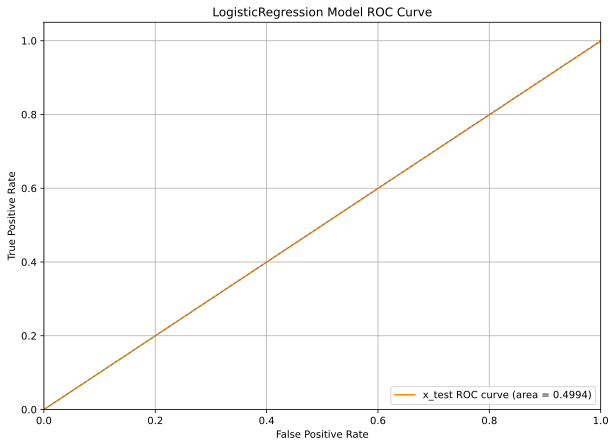

In [28]:
plt.figure(figsize=(10,7))

plt.plot(
    X_test_fpr, X_test_tpr, color='darkorange', label='x_test ROC curve (area = %0.4f)' % X_test_roc_auc
)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

# RandomForestClassifier 隨機森林

Hint: 正規化後，accuracy 分數沒有較高

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_model = RandomForestClassifier()

對 $X$ 進行正規化。

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# X_train_stds = sc.fit_transform(X_train)
# X_test_stds = sc.fit_transform(X_test)

# 不正規化
X_train_stds = X_train.values
X_test_stds = X_test.values

進行訓練。

In [32]:
rf_model.fit(X_train_stds, y_train)

RandomForestClassifier()

預測。

In [33]:
y_test_pred = rf_model.predict(X_test_stds)

預測值機率 (Predict Probability)。

- **predict_proba** 的輸出是一對值，其中：
  - **a** = $P(\text{class}(x) = 0)$
  - **b** = $P(\text{class}(x) = 1)$

In [34]:
rf_model_proba = rf_model.predict_proba(X_test_stds)

rf_model_proba

array([[0.73, 0.27],
       [0.85, 0.15],
       [0.74, 0.26],
       ...,
       [0.92, 0.08],
       [0.7 , 0.3 ],
       [0.7 , 0.3 ]])

準確率。直接用 `model.score`

In [35]:
print('regr_model.score: %0.4f' % rf_model.score(X_test.values, y_test))

regr_model.score: 0.8650


Accurary, Precision, Recall, F1-Score.

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

regr_model_acc = accuracy_score(y_test, y_test_pred)
regr_model_precision = precision_score(y_test, y_test_pred)
regr_model_recall = recall_score(y_test, y_test_pred)
regr_model_f1 = f1_score(y_test, y_test_pred)

print('regr_model_acc:\t\t%0.4f' % regr_model_acc)
print('regr_model_precision:\t%0.4f' % regr_model_precision)
print('regr_model_recall:\t%0.4f' % regr_model_recall)
print('regr_model_f1:\t\t%0.4f' % regr_model_f1)

regr_model_acc:		0.8650
regr_model_precision:	0.7491
regr_model_recall:	0.5012
regr_model_f1:		0.6006


ROC & AUC

In [37]:
from sklearn.metrics import roc_curve, auc

# 對測試集 X_test 使用模型進行預測，並取出模型預測的「陽性」機率分數。
X_test_predsba = rf_model.predict_proba(X_test.values)[:,1]

# 計算測試資料的 ROC 曲線資料，並返回三個值
X_test_fpr, X_test_tpr, x_test_thresholds = roc_curve(y_test, X_test_predsba)

# 計算 AUC（曲線下面積），衡量模型區分「陽性」和「陰性」樣本的能力。
X_test_roc_auc = auc(X_test_fpr, X_test_tpr)

print('x_test AUC: %0.4f' % X_test_roc_auc)

x_test AUC: 0.8666


畫出曲線圖。

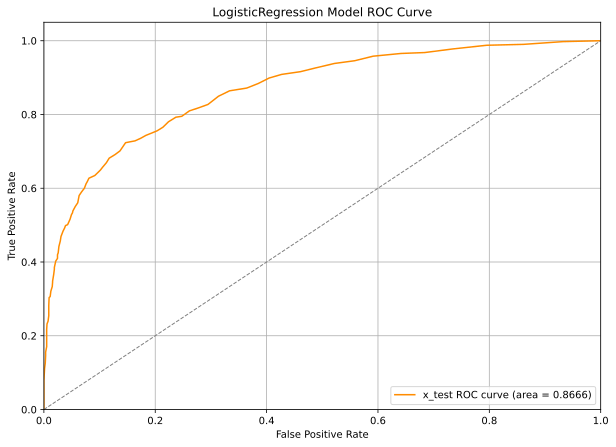

In [38]:
plt.figure(figsize=(10,7))

plt.plot(
    X_test_fpr, X_test_tpr, color='darkorange', label='x_test ROC curve (area = %0.4f)' % X_test_roc_auc
)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression Model ROC Curve')
plt.legend(loc="lower right")

plt.show()